***

# sklearn example

> **sklearn.datasets**

 > built in breast cancer dataset
 
 >       from sklearn.datasets import load_breast_cancer
 >       cancer = load_breast_cancer()
 >       print(cancer.DESCR)
 >       cancer_df = cancer.data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer

In [17]:
cancer = load_breast_cancer()
cancer.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [18]:
print cancer.DESCR

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [20]:
cancer.feature_names[:5]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness'],
      dtype='|S23')

In [23]:
df_feature = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [24]:
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])

In [26]:
df = pd.concat([df_feature,df_target],axis = 1)

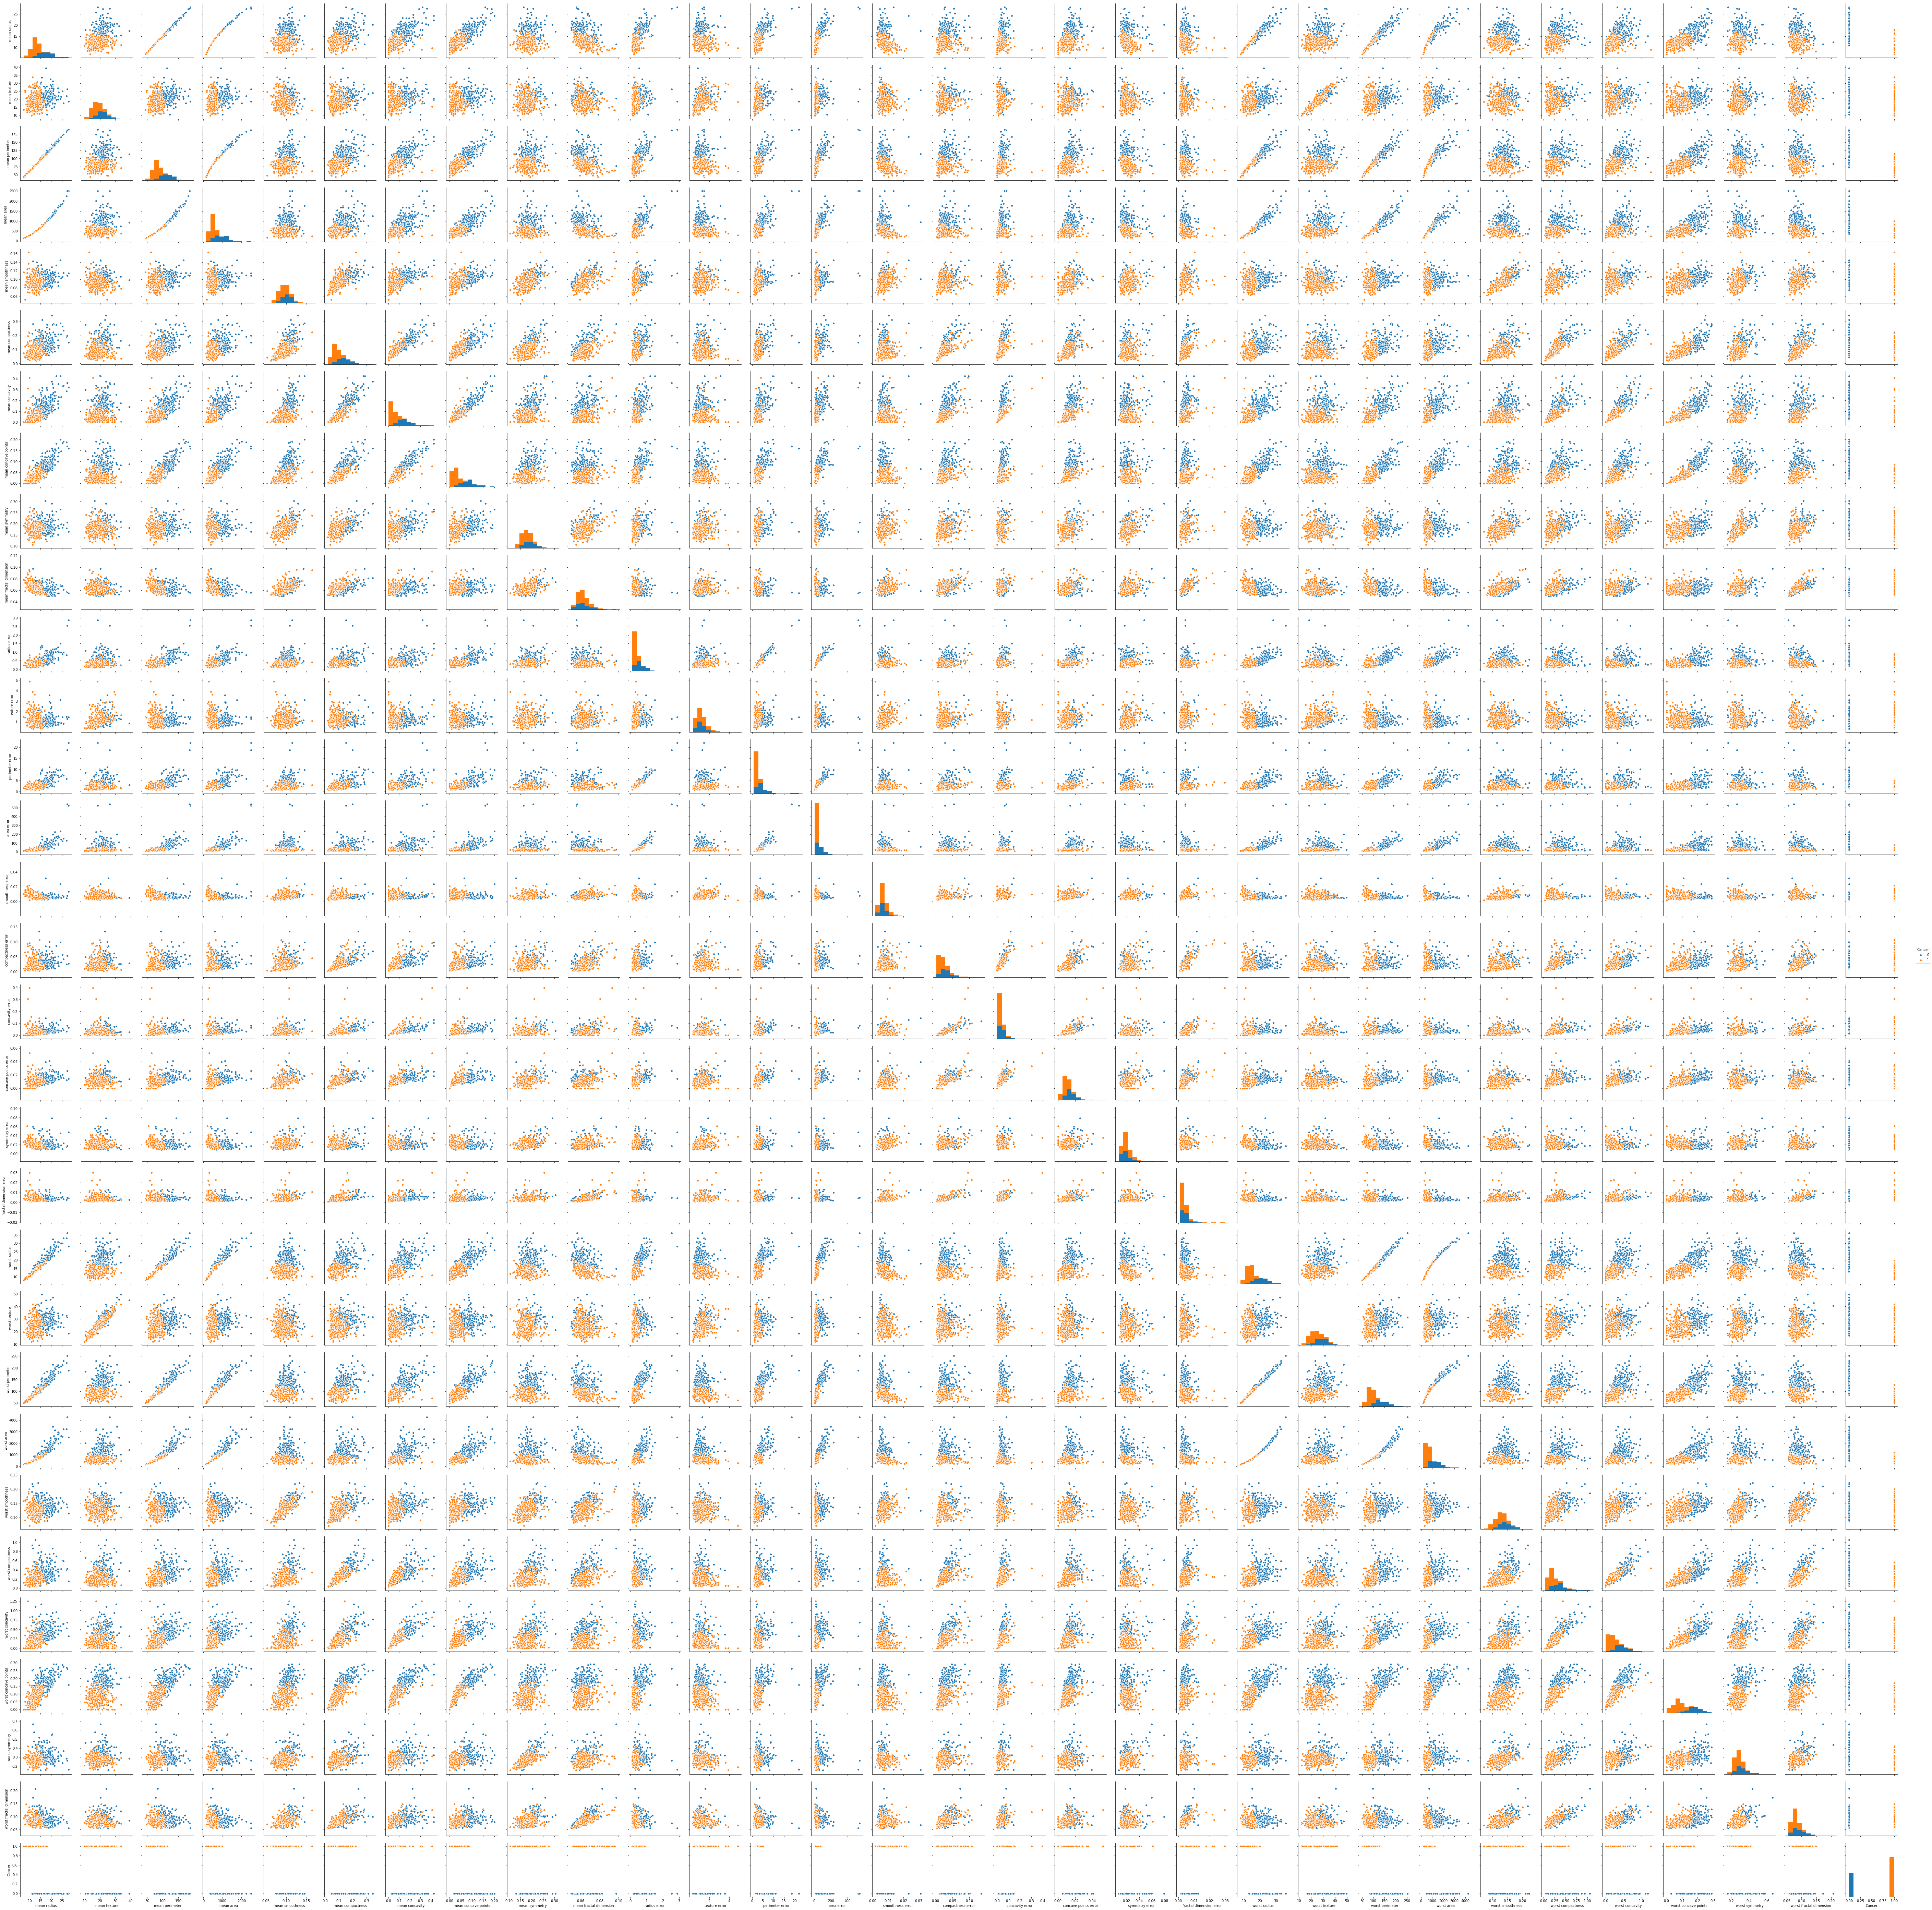

In [28]:
sns.pairplot(df,hue = "Cancer")

## Train

In [54]:
from sklearn.cross_validation import train_test_split

In [72]:
X = df_feature
y = df_target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=325)

In [73]:
from sklearn.svm import SVC
svm = SVC()

In [74]:
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
# change the shape of y to (n_samples, ), for example using ravel()
svm.fit(X_train,np.ravel(y_train))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Predictions and Evaluations



In [76]:
pred = svm.predict(X_test)

In [77]:
from sklearn.metrics import confusion_matrix, classification_report

In [78]:
print confusion_matrix(y_test,pred)
print "\n"
print classification_report(y_test,pred)

[[ 0 77]
 [ 0 94]]


             precision    recall  f1-score   support

          0       0.00      0.00      0.00        77
          1       0.55      1.00      0.71        94

avg / total       0.30      0.55      0.39       171



## Grid Search - find best parameter

In [79]:
from sklearn.grid_search import GridSearchCV

In [80]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001] }
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [81]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [88]:
grid.fit(X_train,y_train)

IndexError: too many indices for array

In [92]:
# y should be 1 d array
grid.fit(X_train,y_train.Cancer[:])

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV] ............. kernel=rbf, C=0.1, gamma=1, score=0.661654 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV] ............. kernel=rbf, C=0.1, gamma=1, score=0.661654 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV] ............. kernel=rbf, C=0.1, gamma=1, score=0.659091 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV] ........... kernel=rbf, C=0.1, gamma=0.1, score=0.661654 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV] ........... kernel=rbf, C=0.1, gamma=0.1, score=0.661654 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV] ........... kernel=rbf, C=0.1, gamma=0.1, score=0.659091 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.01 ...................................
[CV] .......... 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............ kernel=rbf, C=1, gamma=0.01, score=0.661654 -   0.0s
[CV] kernel=rbf, C=1, gamma=0.01 .....................................
[CV] ............ kernel=rbf, C=1, gamma=0.01, score=0.659091 -   0.0s
[CV] kernel=rbf, C=1, gamma=0.001 ....................................
[CV] ........... kernel=rbf, C=1, gamma=0.001, score=0.924812 -   0.0s
[CV] kernel=rbf, C=1, gamma=0.001 ....................................
[CV] ........... kernel=rbf, C=1, gamma=0.001, score=0.947368 -   0.0s
[CV] kernel=rbf, C=1, gamma=0.001 ....................................
[CV] ........... kernel=rbf, C=1, gamma=0.001, score=0.939394 -   0.0s
[CV] kernel=rbf, C=1, gamma=0.0001 ...................................
[CV] .......... kernel=rbf, C=1, gamma=0.0001, score=0.962406 -   0.0s
[CV] kernel=rbf, C=1, gamma=0.0001 ...................................
[CV] .......... kernel=rbf, C=1, gamma=0.0001, score=0.954887 -   0.0s
[CV] kernel=rbf, C=1, gamma=0.0001 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [93]:
grid.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [94]:
grid.best_score_

0.957286432160804

In [95]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [96]:
grid_pred = grid.predict(X_test)

In [97]:
print confusion_matrix(y_test,grid_pred)
print "\n"
print classification_report(y_test,grid_pred)

[[62 15]
 [ 2 92]]


             precision    recall  f1-score   support

          0       0.97      0.81      0.88        77
          1       0.86      0.98      0.92        94

avg / total       0.91      0.90      0.90       171

